In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E:/daata/HAM10000_metadata.csv")

In [3]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
data=df

In [5]:
idx=data[data['sex']=='unknown'].index

In [6]:
data.drop(idx,inplace=True)

In [7]:
idx=data[data['localization']=='unknown'].index

In [8]:
data.drop(idx,inplace=True)

In [9]:
df.age.max()

85.0

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [12]:
df.drop(df.age.idxmin(),inplace=True)

In [13]:
df.drop(data[data['age']==0.0].index,inplace=True)

In [14]:
#df['age_bins'] = pd.cut(x=df['age'], bins=[5, 12, 19, 26,33,40,47,54,62,69,74,81,88])
#data_with_groupby= data.groupby(['age_bins'])
#ax = sns.catplot(x="age_bins", y="localization",data=data_with_groupby,kind="bar")

In [15]:
data.shape

(9724, 7)

Text(0.5, 1.0, 'frq of each disease')

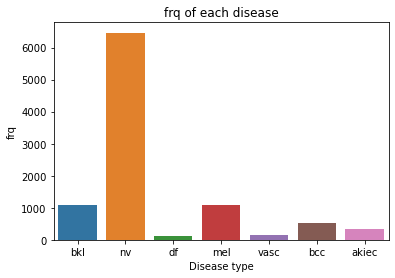

In [16]:
sns.countplot(x = 'dx', data = df)
#df.plot(x="dx", kind="bar")
plt.xlabel('Disease type')
plt.ylabel('frq')
plt.title('frq of each disease')

Text(0.5, 1.0, 'age frq')

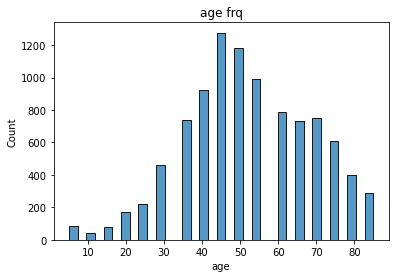

In [17]:
plt.subplots()
sns.histplot(df['age'])
plt.title('age frq')

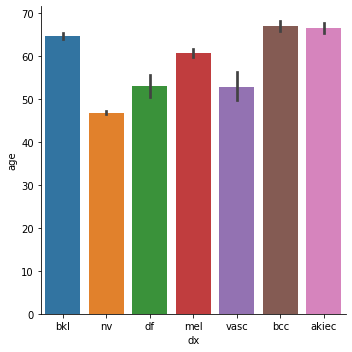

In [18]:
ax = sns.catplot(x='dx', y="age",data=df,kind="bar")

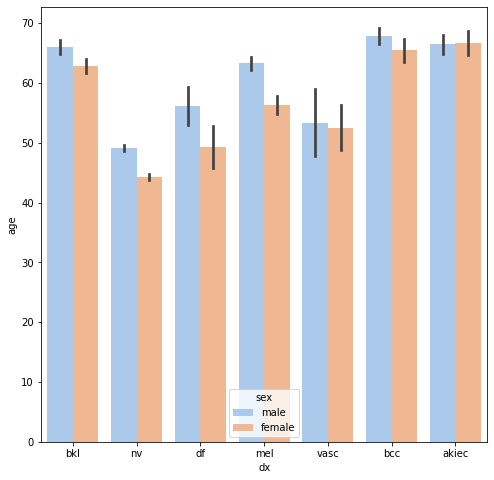

In [19]:
bar, ax = plt.subplots(figsize = (8, 8))
sns.set_palette("pastel")
sns.barplot(x = 'dx',
            y = 'age',
            hue = 'sex',
            data = data
            )
plt.show()

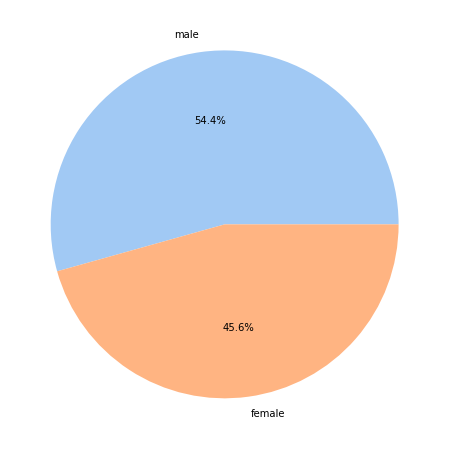

In [20]:

bar, ax = plt.subplots(figsize = (8, 8))
plt.pie(data['sex'].value_counts(), labels = data['sex'].value_counts().index,autopct="%.1f%%")
plt.show()

<AxesSubplot:xlabel='location', ylabel='count'>

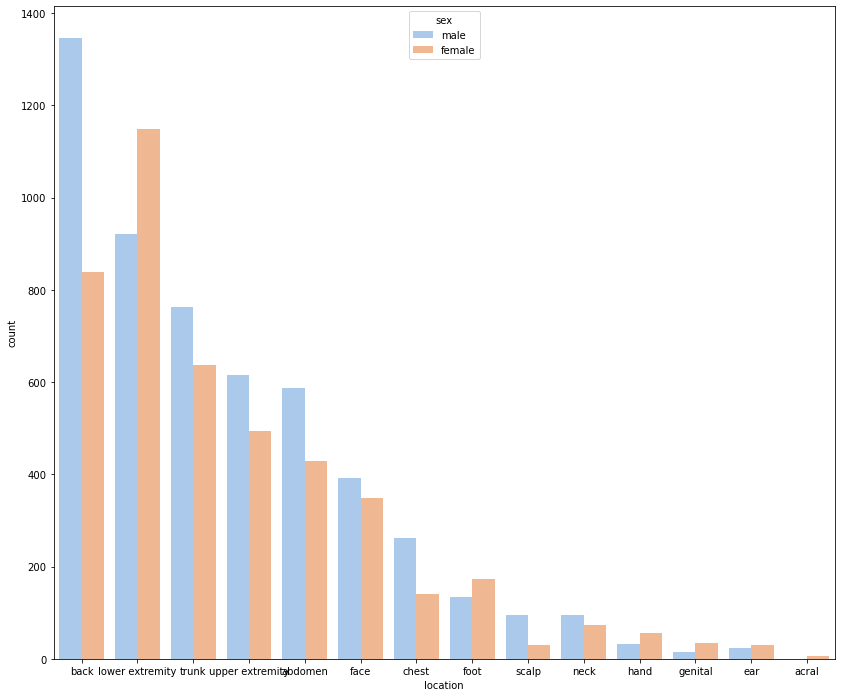

In [21]:
value=data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})
bar, ax = plt.subplots(figsize = (14, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)

Text(0.5, 1.0, 'localization frq')

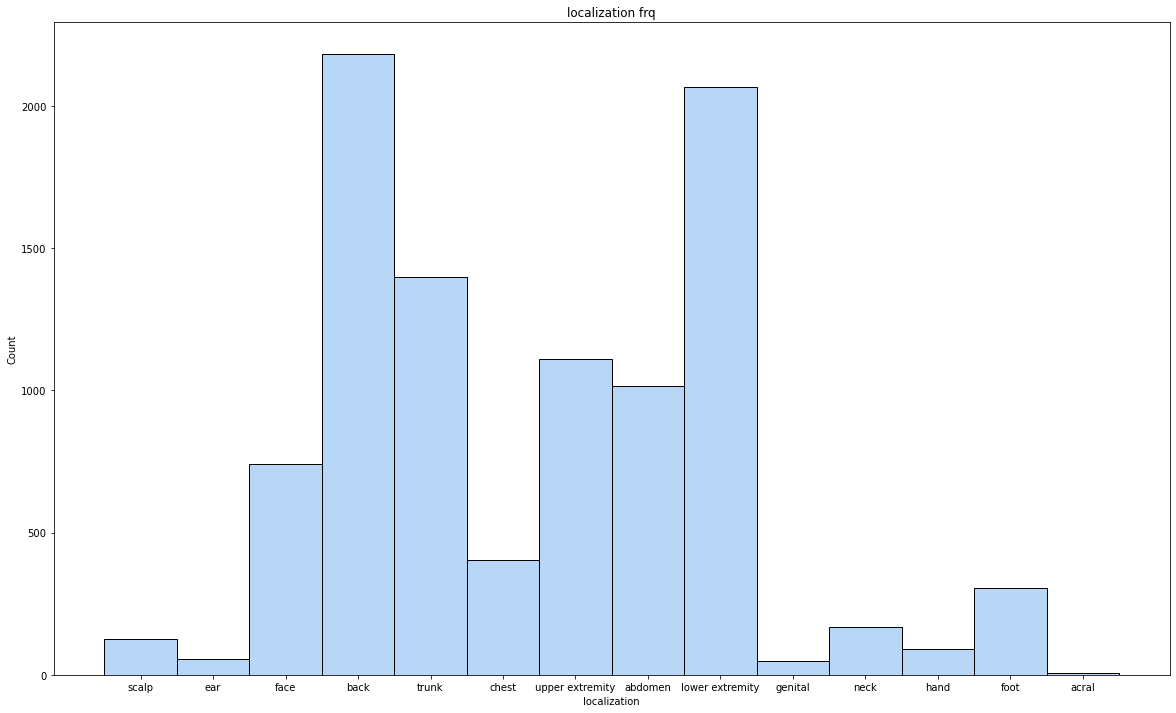

In [22]:
bar, ax = plt.subplots(figsize = (20, 12))
sns.histplot(data['localization'])
plt.title('localization frq')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [3]:
import pandas as pd
data = pd.read_csv('E:/daata/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [4]:
y = data['label']
x = data.drop(columns = ['label'])

In [69]:
y.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [5]:
x.shape

(10015, 2352)

In [6]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [8]:
#x = np.array(x).reshape(-1,28,28,3)
scaled = np.array(scaled).reshape(-1,28,28,3)

In [7]:
#x = (x-np.mean(x))/np.std(x)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)


In [9]:
print(scaled.shape)
print(y.shape)

(46935, 28, 28, 3)
(46935,)


In [16]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split( scaled, y, test_size=0.2, random_state=1,shuffle=True)
#X_train=X_train/255
#X_test=X_test/255

In [17]:
print(X_train.shape)
print(y_train.shape)

(37548, 28, 28, 3)
(37548,)


In [18]:

model=Sequential()

model.add(Conv2D(64, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

checkpoint_filepath = 'best_weights.h'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

model.fit(X_train,y_train,validation_split=0.2,batch_size = 100,epochs = 40,callbacks=[model_checkpoint_callback])


Epoch 1/40
301/301 [==============================] - 60s 199ms/step - loss: 1.5334 - accuracy: 0.3736 - val_loss: 1.2407 - val_accuracy: 0.5194
Epoch 2/40
301/301 [==============================] - 53s 176ms/step - loss: 1.1764 - accuracy: 0.5431 - val_loss: 1.1487 - val_accuracy: 0.5549
Epoch 3/40
301/301 [==============================] - 54s 178ms/step - loss: 0.9929 - accuracy: 0.6215 - val_loss: 0.9221 - val_accuracy: 0.6381
Epoch 4/40
301/301 [==============================] - 52s 174ms/step - loss: 0.8149 - accuracy: 0.6947 - val_loss: 0.7414 - val_accuracy: 0.7153
Epoch 5/40
301/301 [==============================] - 47s 155ms/step - loss: 0.6760 - accuracy: 0.7481 - val_loss: 0.6465 - val_accuracy: 0.7523
Epoch 6/40
301/301 [==============================] - 46s 154ms/step - loss: 0.5925 - accuracy: 0.7811 - val_loss: 0.5761 - val_accuracy: 0.7808
Epoch 7/40
301/301 [==============================] - 47s 155ms/step - loss: 0.5156 - accuracy: 0.8081 - val_loss: 0.5250 - val_ac

In [19]:
model.load_weights(checkpoint_filepath)
loss, acc = model.evaluate(X_test, y_test)

294/294 [==============================] - 2s 8ms/step - loss: 0.1710 - accuracy: 0.9528
